# 1. Libraries & Data Loading

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [101]:
df = pd.read_pickle("data/df_data.pkl")

In [102]:
df.head()

,Title,Category,Links,Text
0,Climate emergency declaration,Global_warming,"[Aachen, Acri, Adam Bandt, Adelaide, Alexandri...",A climate emergency declaration or declaring a...
1,Global warming,Global_warming,"[Abrupt climate change, Absorption (electromag...",Global warming is the mainly human-caused rise...
2,Shared Socioeconomic Pathways,Global_warming,"[Abrupt climate change, Albedo, Anoxic event, ...",Shared Socioeconomic Pathways (SSPs) are scena...
3,Glossary of climate change,Global_warming,"[100,000-year problem, 20th parallel north, 37...",This glossary of climate change is a list of d...
4,Index of climate change articles,Global_warming,"[100% renewable energy, 100,000-year problem, ...",This is a list of climate change topics.\n\n0-...


# 2. Data Cleaning

In [103]:
df['Title'].is_unique

False

This means that some articles belong to several categories and will therefore need to be grouped

In [104]:
df = df.groupby('Title').agg(list).reset_index()
df['Links'] = df['Links'].apply(np.unique)
df['Text'] = df['Text'].apply(lambda x: list(set(x))[0])

In [79]:
df.head()

,Title,Category,Links,Text
0,"1,1,1,2,3,3,3-Heptafluoropropane",[Fire suppression agents],"[1,1,1,2,2,3,3-Heptachloropropane, 1,1,1,2,3,3...","1,1,1,2,3,3,3-Heptafluoropropane, also called ..."
1,"1,1,1,3,3,3-Hexafluoropropane",[Fire suppression agents],"[1,1,1,3,3,3-Hexafluoropropane (data page), 1,...","1,1,1,3,3,3-Hexafluoropropane is an organic ch..."
2,"1,1-Dichloroethane",[Fire suppression agents],"[1,1,1-Trichloroethane, 1,1-Dichloroethane (da...","1,1-Dichloroethane is a chlorinated hydrocarbo..."
3,100 First Plaza,[Leadership in Energy and Environmental Design...,"[100 Montgomery Street, 100 Pine Center, 100 V...",100 First Plaza (also known as the Delta Denta...
4,100 North Tampa,[Leadership in Energy and Environmental Design...,"[AmSouth Bancorporation, American Internationa...","100 North Tampa, formerly known as the Regions..."


In [61]:
print("Number of unique articles:", len(df))

Number of unique articles: 6229


# 3. Data Exploration

## Links

Text(0.5, 1.0, 'Histogram of the number of Wikipedia links in a Wikipedia page')

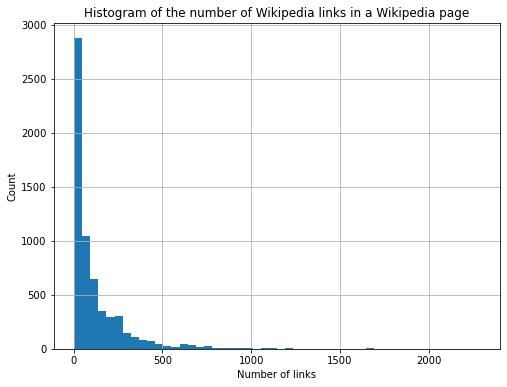

In [62]:
fig = plt.figure(figsize=(8,6))
num_links = df['Links'].apply(len)
num_links.hist(bins=50)
plt.xlabel("Number of links")
plt.ylabel("Count")
plt.title("Histogram of the number of Wikipedia links in a Wikipedia page")

Text(0.5, 1.0, 'Histogram of the number of Wikipedia links in a Wikipedia page')

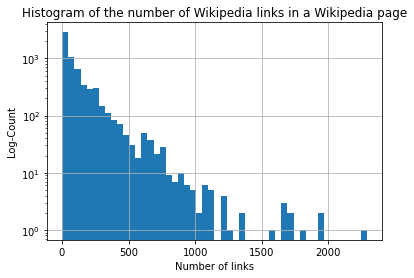

In [63]:
num_links.hist(bins=50)
plt.yscale('log')
plt.xlabel("Number of links")
plt.ylabel("Log-Count")
plt.title("Histogram of the number of Wikipedia links in a Wikipedia page")

From the first plot, we could already see that the number of links is right-skewed.

In [64]:
num_links.describe()

count    6229.000000
mean      123.545513
std       174.293001
min         2.000000
25%        24.000000
50%        56.000000
75%       150.000000
max      2287.000000
Name: Links, dtype: float64

Several similarity measures can be applied here, one of them is the Jaccard similarity applied to the links in each page.

In [65]:
def jaccard_similarity(list1, list2):
    s1 = set(list1)
    s2 = set(list2)
    return len(s1.intersection(s2)) / len(s1.union(s2))

## Categories

In [68]:
categories = np.unique(df['Category'].sum())

In [69]:
len(categories)

683

## Text

In [70]:
len_texts = df['Text'].apply(len)

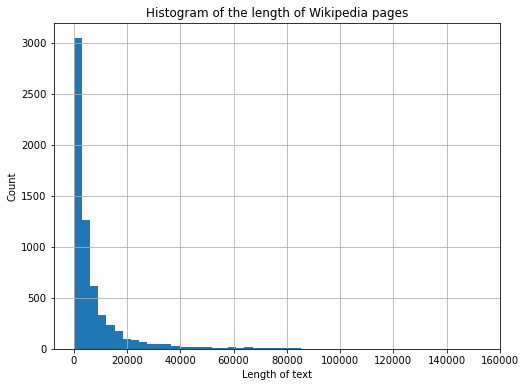

In [71]:
fig = plt.figure(figsize=(8,6))
len_texts.hist(bins=50)
plt.xlabel("Length of text")
plt.ylabel("Count")
plt.title("Histogram of the length of Wikipedia pages")
plt.show()

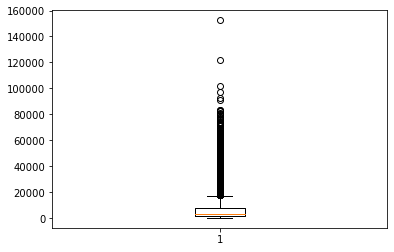

In [72]:
plt.boxplot(len_texts)
plt.show()